<a href="https://colab.research.google.com/github/nurefsanoztekin/datan/blob/main/Nuref%C5%9Fan_%C3%96ZTEK%C4%B0N_6.hafta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd

from sklearn import preprocessing

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
data_link= 'https://raw.githubusercontent.com/nurefsanoztekin/datan/main/Dataset%20of%20Diabetes%20.csv'
feature = ["ID","No_Pation","Gender", "AGE", "Urea", "Cr","HbA1c","Chol", "TG","HDL","LDL","VLDL","BMI", "Class"]

data = pd.read_csv(data_link, na_values = '?', names = feature, header=0)
data = data.drop(["ID"], axis=1)
data.sample(13)



,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
731,34510,M,61,6.5,78,9.2,6.5,2.4,1.7,1.8,1.5,37.0,Y
130,87659,F,33,2.7,47,6.0,4.2,1.4,1.3,2.6,0.7,24.0,P
375,5677,F,68,5.7,71,7.0,5.0,1.7,0.8,3.5,0.8,36.6,Y
165,23990,M,35,4.8,64,7.7,3.7,1.0,1.2,2.0,7.2,27.3,Y
205,24018,F,33,1.8,31,7.4,3.7,1.2,1.6,1.5,0.5,31.5,Y
152,45397,M,54,4.0,88,5.7,4.4,2.9,0.6,2.5,1.3,28.0,P
131,87660,F,30,5.7,53,6.0,5.4,1.7,1.4,3.3,0.7,22.0,P
587,34453,F,61,13.2,98,8.0,6.6,4.5,1.6,0.9,2.0,26.0,Y
82,45374,F,35,3.6,61,5.3,4.3,1.3,0.8,1.3,1.0,24.0,N
594,34457,M,51,4.0,95,7.1,4.2,1.9,0.9,1.1,0.8,30.0,Y


In [36]:
print("Satır:", data.shape[0], '\t', "Sütun:", data.shape[1])

print("-"*73)

print(data.columns)

Satır: 1000 	 Sütun: 13
-------------------------------------------------------------------------
Index(['No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'Class'],
      dtype='object')


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No_Pation  1000 non-null   int64  
 1   Gender     1000 non-null   object 
 2   AGE        1000 non-null   int64  
 3   Urea       1000 non-null   float64
 4   Cr         1000 non-null   int64  
 5   HbA1c      1000 non-null   float64
 6   Chol       1000 non-null   float64
 7   TG         1000 non-null   float64
 8   HDL        1000 non-null   float64
 9   LDL        1000 non-null   float64
 10  VLDL       1000 non-null   float64
 11  BMI        1000 non-null   float64
 12  Class      1000 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 101.7+ KB


In [38]:
data["Class"].value_counts()

Y     840
N     102
P      53
Y       4
N       1
Name: Class, dtype: int64

In [39]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
No_Pation,1000.0,270551.408000,3.380758e+06,123.0,24063.75,34395.5,45384.25,75435657.00
AGE,1000.0,53.528000,8.799241e+00,20.0,51.00,55.0,59.00,79.00
Urea,1000.0,5.124743,2.935165e+00,0.5,3.70,4.6,5.70,38.90
Cr,1000.0,68.943000,5.998475e+01,6.0,48.00,60.0,73.00,800.00
HbA1c,1000.0,8.281160,2.534003e+00,0.9,6.50,8.0,10.20,16.00
Chol,1000.0,4.862820,1.301738e+00,0.0,4.00,4.8,5.60,10.30
TG,1000.0,2.349610,1.401176e+00,0.3,1.50,2.0,2.90,13.80
HDL,1000.0,1.204750,6.604136e-01,0.2,0.90,1.1,1.30,9.90
LDL,1000.0,2.609790,1.115102e+00,0.3,1.80,2.5,3.30,9.90
VLDL,1000.0,1.854700,3.663599e+00,0.1,0.70,0.9,1.50,35.00


In [40]:
data.sample(5)

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
895,6734,M,56,4.9,32,10.7,3.6,3.6,1.3,0.9,1.6,31.0,Y
312,24071,F,56,5.5,48,9.3,5.8,2.4,0.9,3.9,1.1,36.6,Y
692,2094,F,55,3.9,49,12.2,4.8,2.1,1.8,1.0,0.9,30.0,Y
113,298,M,50,4.7,53,6.1,4.2,2.2,0.8,2.5,0.9,25.0,P
955,45387,F,50,2.5,79,8.1,7.4,3.3,0.8,4.0,0.8,22.0,Y


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


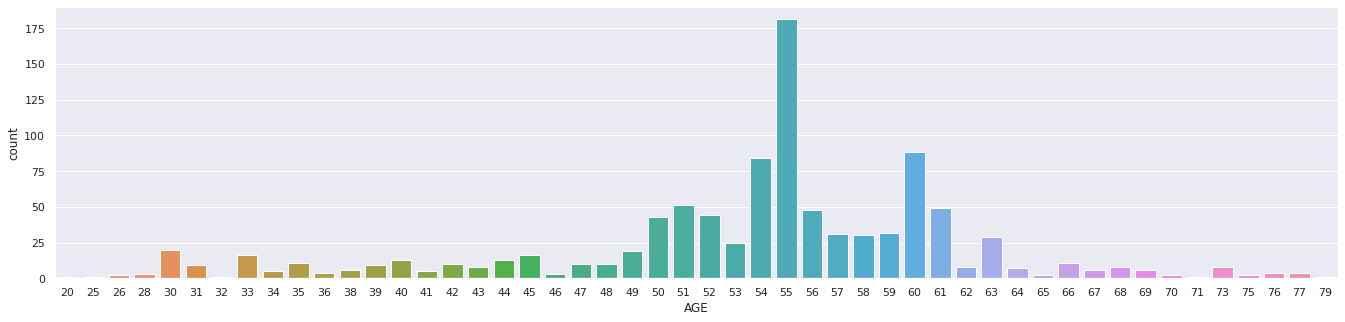

In [41]:
plt.subplots(figsize=(23,5))
sns.countplot(data["AGE"])

In [42]:
data['AGE_groupped']=pd.cut(data['AGE'], bins=[0,23,46,59,81])
data.sample(5)

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class,AGE_groupped
161,67036,M,31,3.4,55,6.5,4.9,1.6,1.0,3.20,0.7,24.0,Y,"(23, 46]"
353,5609,M,55,4.6,77,6.5,6.0,1.5,1.3,4.10,0.6,30.0,Y,"(46, 59]"
796,34547,F,60,2.1,34,12.3,6.2,5.8,1.0,3.00,2.0,30.0,Y,"(59, 81]"
185,34288,M,39,4.3,49,5.1,6.7,2.5,1.1,4.50,1.1,25.0,Y,"(23, 46]"
251,24041,M,51,6.5,70,7.3,3.5,1.8,1.8,1.95,0.8,32.0,Y,"(46, 59]"


In [43]:
data['AGE_groupped']=pd.cut(data['AGE'], bins=[0,23,46,59,81], labels = ["Çocuk", "Genç", "Orta Yaş","İleri Yaş"])
data.sample(4)

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class,AGE_groupped
398,34356,M,60,6.2,87,4.8,4.8,1.6,0.8,1.2,0.5,35.0,Y,İleri Yaş
910,8978,M,60,5.4,64,10.4,3.8,1.5,0.8,2.3,0.6,31.0,Y,İleri Yaş
406,34358,F,61,10.5,111,8.2,3.8,3.0,0.9,1.7,1.3,39.0,Y,İleri Yaş
968,45450,M,64,8.8,106,8.2,3.8,3.0,0.9,1.7,1.3,30.0,Y,İleri Yaş


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


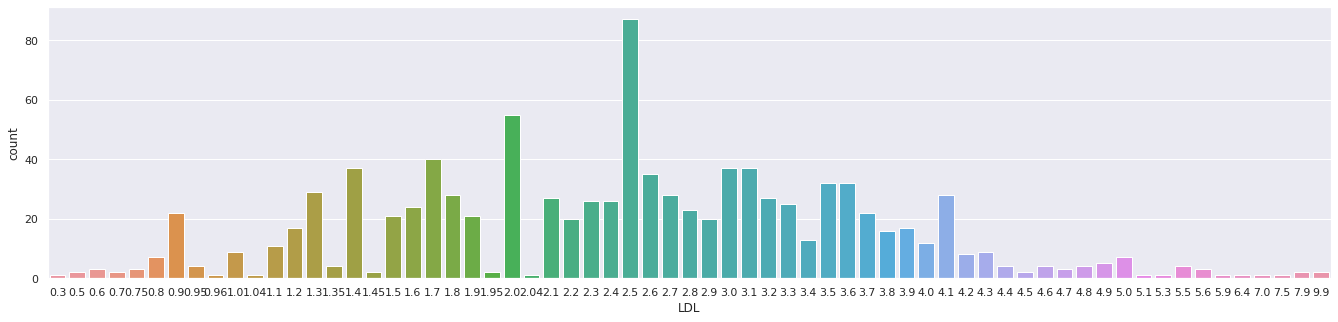

In [44]:
plt.subplots(figsize=(23,5))
sns.countplot(data["LDL"])

In [45]:
data["LDL_groupped"] = pd.cut(data["LDL"], 5, 
                                 labels = ['G1','G2','G3','G4','G5'])
data.sample(5)

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class,AGE_groupped,LDL_groupped
948,5676,F,60,3.40,27,14.7,3.5,1.9,1.3,1.6,1.4,35.00,Y,İleri Yaş,G1
940,67547,F,61,3.40,38,9.2,3.9,2.8,1.2,1.5,1.3,26.00,Y,İleri Yaş,G1
585,654,F,67,4.50,56,13.1,4.4,2.0,1.0,2.5,0.9,29.00,Y,İleri Yaş,G2
532,64348,M,55,4.66,70,7.5,7.3,1.6,1.2,5.5,11.3,36.11,Y,Orta Yaş,G3
54,34262,F,50,4.40,69,5.0,3.9,0.7,2.3,0.3,0.4,24.00,N,Orta Yaş,G1


In [46]:
data['AGE_groupped']=pd.cut(data['AGE'],
                            bins = [0,10,20,30,40,50,60,70,80,90],
                            labels = [0, 1, 2,3,4,5,6,7,8])
data.sample(4)

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class,AGE_groupped,LDL_groupped
640,45703,M,51,3.9,53,10.9,3.6,1.1,0.8,2.3,1.0,29.0,Y,5,G2
890,5653,M,60,6.9,79,8.0,2.5,1.9,1.3,3.1,0.8,30.0,Y,5,G2
731,34510,M,61,6.5,78,9.2,6.5,2.4,1.7,1.8,1.5,37.0,Y,6,G1
988,454316,M,55,4.8,88,11.1,5.7,4.0,0.9,3.3,1.8,30.0,Y,5,G2


In [47]:
data = data.drop(["LDL_groupped","AGE_groupped"], axis=1)
data.sample(7)

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
225,34311,F,56,8.5,92,5.7,4.8,1.7,1.3,2.8,0.7,35.0,Y
988,454316,M,55,4.8,88,11.1,5.7,4.0,0.9,3.3,1.8,30.0,Y
576,7363,F,56,7.7,68,9.8,6.1,3.2,0.7,4.1,1.4,27.0,Y
396,7898,M,55,3.7,93,7.2,3.2,1.9,0.6,1.8,0.8,31.0,Y
362,24094,F,60,3.0,42,6.2,5.8,0.9,1.0,4.4,0.4,27.0,Y
733,21761,F,59,5.7,86,9.3,5.3,2.7,1.0,3.2,1.2,31.0,Y
185,34288,M,39,4.3,49,5.1,6.7,2.5,1.1,4.5,1.1,25.0,Y


In [48]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

###########################################################

def Random_Under_Sampler(data):
    
    x = data.drop(columns=['Class'])
    y = data['Class']
    
    rus = RandomUnderSampler()
    x_rus, y_rus = rus.fit_resample(x, y)
    data_rus = pd.concat([x_rus, y_rus], axis=1)
    
    print("RUS")
    print('original dataset shape:', Counter(y))
    print('Resample dataset shape', Counter(y_rus))
    
    return data_rus

###########################################################

def Random_Over_Sampler(data):
    
    x = data.drop(columns=['Class'])
    y = data['Class']
    
    ros = RandomOverSampler(random_state=42)
    x_ros, y_ros = ros.fit_resample(x, y)
    data_ros = pd.concat([x_ros, y_ros], axis=1)
    
    print("ROS")
    print('Original dataset shape', Counter(y))
    print('Resample dataset shape', Counter(y_ros))
    
    return data_ros

###########################################################

def TomekLinks_Under_Sampler(data):
    
    x = data.drop(columns=['Class'])
    y = data['Class']
    
    tl = TomekLinks(sampling_strategy='majority')
    x_tl, y_tl = tl.fit_resample(x, y)
    data_tl = pd.concat([x_tl, y_tl], axis=1)

    print("TL")
    print('Original dataset shape:', Counter(y))
    print('Resample dataset shape:', Counter(y_tl))
    
    return data_tl

###########################################################

def SyntheticMinority_Over_Sampler(data):
    
    x = data.drop(columns=['Class'])
    y = data['Class']
    
    smote = SMOTE()
    x_smote , y_smote = smote.fit_resample(x, y)
    data_smote = pd.concat([x_smote , y_smote], axis=1)

    print("SMOTE")
    print('Original dataset shape:', Counter(y))
    print('Resampple dataset shape:', Counter(y_smote))
    
    return data_smote

###########################################################

def NearMiss_Under_Sampler(data):
    
    x = data.drop(columns=['Class'])
    y = data['Class']
    
    nm = NearMiss()
    x_nm, y_nm = nm.fit_resample(x, y)
    data_nm = pd.concat([x_nm, y_nm], axis=1)
    
    print("NMUS")
    print('Original dataset shape:', Counter(y))
    print('Resample dataset shape:', Counter(y_nm))
    
    return data_nm

In [49]:
data_RUS = Random_Under_Sampler(data)

RUS
original dataset shape: Counter({'Y': 840, 'N': 102, 'P': 53, 'Y ': 4, 'N ': 1})
Resample dataset shape Counter({'N': 1, 'N ': 1, 'P': 1, 'Y': 1, 'Y ': 1})


In [50]:
data_ROS = Random_Over_Sampler(data)

ROS
Original dataset shape Counter({'Y': 840, 'N': 102, 'P': 53, 'Y ': 4, 'N ': 1})
Resample dataset shape Counter({'N': 840, 'N ': 840, 'P': 840, 'Y': 840, 'Y ': 840})


In [55]:
datasets = [data, data_RUS, data_ROS]
titles = ["data", "RUS", "ROS"]

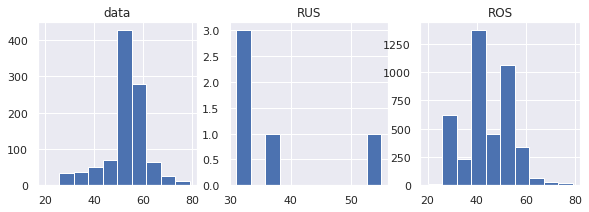

In [56]:
plt.figure(figsize=(20,3))

for i, data in enumerate(datasets):
    plt.subplot(1,6,i+1)
    data["AGE"].hist()
    plt.title(titles[i])

plt.show()

In [59]:
x = data.drop(columns=['Class'])
y = data['Class']

In [61]:
scaler = preprocessing.StandardScaler()
x_std = scaler.fit_transform(x)
x_std = pd.DataFrame(x_std)
x_std.columns =  x.columns

x_std.sample(4)

ValueError: ignored

In [62]:
from sklearn.decomposition import PCA

PCA = PCA(n_components= 2)
PCA.fit(x_std)

X = PCA.transform(x_std)

print("varience ratio: ", PCA.explained_variance_ratio_)
print("sum of varience ratio: ", sum(PCA.explained_variance_ratio_))

NameError: ignored